# Predicting Property Valuation in Southern California
### by Daniel Northcutt

### My goal today is to predict single family home values in three counties in California as accurately as possible 


#### I will be conveying this by:
    - Gathering and cleaning Zillow Data from 2017 homes in Orange, 
    Ventura, and LA county
    - Exploring the data through visual representations and 
    statistical testing
    - Evaluate and model our data
    
#### Through data exploration I came to focus on 4 questions:
    - Does county location affect tax values?
    - Does the number of bedrooms and/or bathrooms affect tax values?
    - Does the square foot of a home affect the tax value?
    - Is there a relationship between home age and tax value?


    
### My key findings is that tax values are driven by multiple features. The number of bedrooms, bathrooms, and square footage to tax value became my features to create models from.  I found no clear realtionship between counties and tax value. 


<hr style="border:1px solid black"> </hr>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

import wrangle
import explore
import model

## Acquire/Prepare: 

    - Acquired Data from Codeup SQL Database
    - Cleaned and labeled the data through multiple techniques including removing outliers
    - Split the data across a train, validate, and test groupings which I will be exploring with
    - A lot is under the hood and can be seen via wrangle.py 
    - Note: scaled data is not used until regression modeling


In [2]:
# Acquire, prepare, remove outliers, split, and scaled our data
# A lot is under the hood and can be seen at wrangle.py

train, validate, test = wrangle.wrangle_zillow()
train.head()

,bedroom_count,bathroom_count,square_feet,tax_value,year_built,county,transaction_date,age,county_Orange,county_Ventura,county_tax_avg,baseline,square_feet_scaled,tax_value_scaled,bedroom_count_scaled,bathroom_count_scaled
33416,2.0,1.0,957.0,512701.0,1952.0,Orange,2017-06-22,69.0,1,0,442218.98,372082.528755,-0.002050,157.994141,0.000000,0.000000
10256,4.0,3.0,2290.0,317784.0,1955.0,Orange,2017-03-08,66.0,1,0,442218.98,372082.528755,-0.000860,97.890225,0.666667,0.666667
9626,3.0,1.0,1063.0,428204.0,1952.0,LA,2017-03-03,69.0,0,0,338888.35,372082.528755,-0.001956,131.938945,0.333333,0.000000
20264,3.0,3.0,1904.0,660068.0,1943.0,LA,2017-04-27,78.0,0,0,338888.35,372082.528755,-0.001205,203.435708,0.333333,0.666667
41772,4.0,2.5,2271.0,604000.0,2000.0,Ventura,2017-07-28,21.0,0,1,427070.80,372082.528755,-0.000877,186.146778,0.666667,0.500000


# Let's Explore!

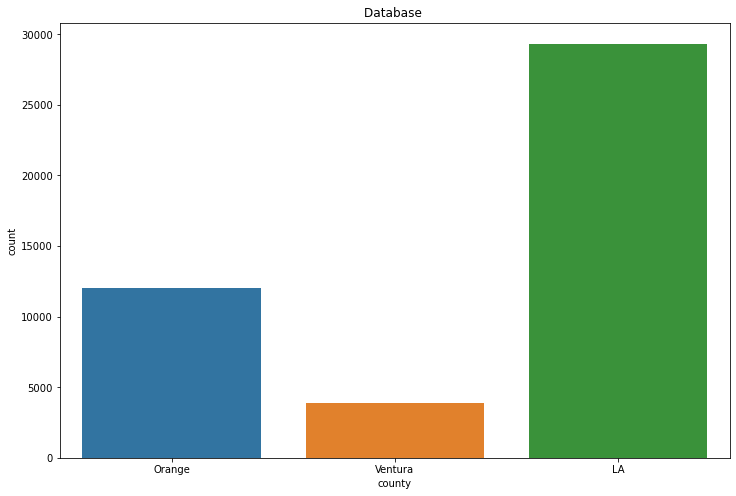

In [3]:
# Do we have greater representation in one county rather than another

# We have nearly twice as many properties representing LA as Ventura and Orange combined

explore.county_countplot()

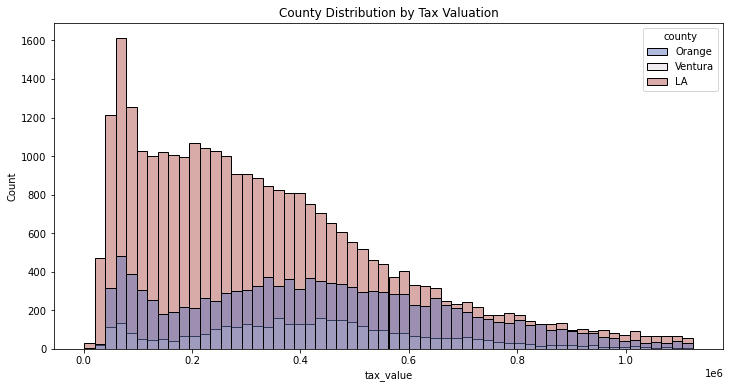

In [4]:
# Here we can see that LA county represents the greatest number of 
# homes in the lower 50% of tax valuations - this gives a unequal relationship of data
explore.county_tax_value()

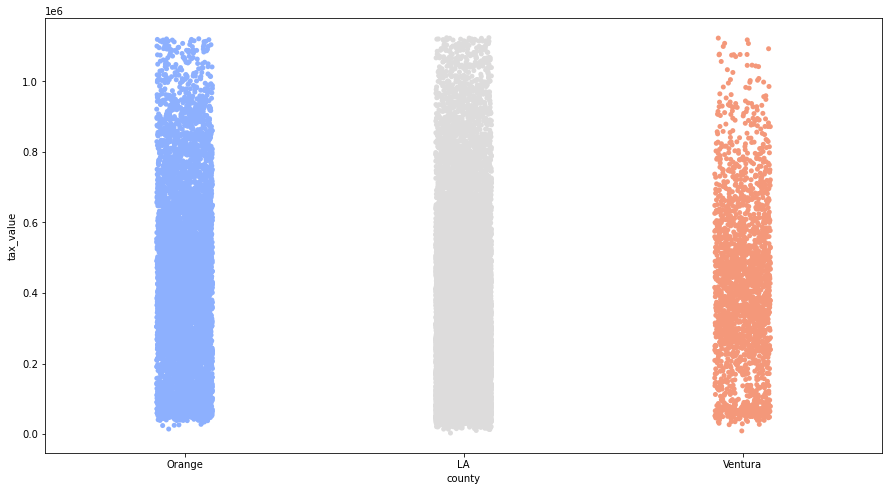

In [5]:
# No clear graphical representation by county and tax_value - due to uneven values of homes assessed
plt.figure(figsize = (15, 8))
sns.stripplot(x = 'county', y = 'tax_value', data = train, palette = 'coolwarm');

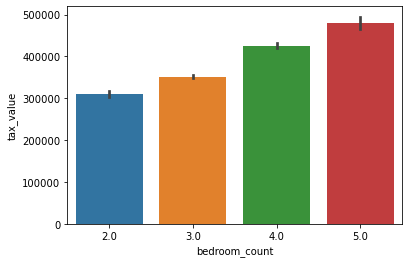

In [6]:
# Representation of number of bedrooms and tax value
sns.barplot(x=train.bedroom_count, y=train.tax_value);


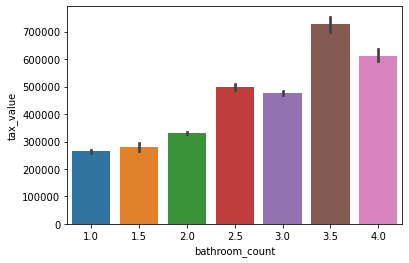

In [7]:
# Representation of number of bedrooms and tax value
sns.barplot(x=train.bathroom_count, y=train.tax_value);


###  Let's see if other features can attribute to tax valuation through a correlation heatmap

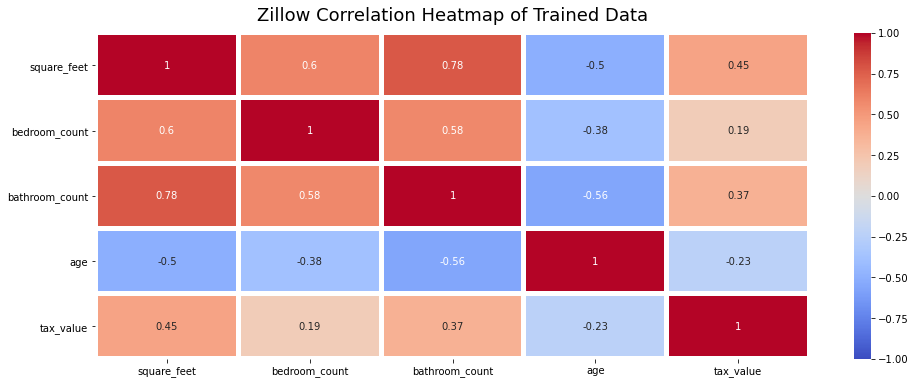

In [8]:
# Heatmap showing correlation of select features

features = ['square_feet', 'bedroom_count', 'bathroom_count', 'tax_value', 'age']
explore.plot_train_heatmap()


This heatmap correlation of features from our train dataset gives us a lot of information
    
    Representing tax valuation: square_feet (0.45), bedroom_count (0.19), and bathroom_count(0.37)
    show positive relationship with tax valuation.  These 3 features should be tested moving forward
    
    note: age represents negative correlation (blue square) likely due to a newer home representing a lower value

<hr style="border:1px solid black"> </hr>


## Let's put these features to the (statistical) test!
    - Using Pearsons R tested: bathroom_count, bedroom_count, and 
    square_feet to tax valuation
    - Alpha (α) = .05
    - Please see explore.py for the code

## Does a greater number of bathrooms cause for a greater tax valuation?

### Testing Bathroom Count to Tax Valuation:

#### Null Hypothesis:
    - There is no correlation between the amount of bathrooms and the tax valuation of a home

#### Alternative Hypothesis:
    - There is a correlation between the amount of bathrooms and the 
    tax valuation of a home

 The correlation between the number of bathrooms and the tax value is: 0.37
 The P value between the number of bathrooms and tax value is:  0.0
 
Reject null hypothesis:
 'There is no correlation between the number of bathrooms and the tax value of a home'


We now move forward with our alternative hypothesis: 'There is a correlation between the number of bathrooms and tax value of a home.'


This is a weak positive correlation.


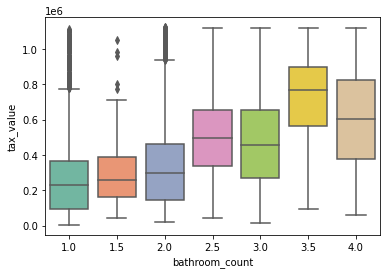

In [9]:
explore.bathroom_taxvalue_corr()

## Does a greater number of bedrooms cause for a greater tax valuation?

### Testing Bedroom Count to Tax Valuation:

#### Null Hypothesis:
    - There is no correlation between the amount of bedrooms and the 
    tax valuation of a home

#### Alternative Hypothesis:
    - There is a correlation between the amount of bedrooms and the 
    tax valuation of a home

 The correlation between the number of bedrooms and the tax value is: 0.19
 The P value between the number of bedrooms and tax value is:  0.00
 
Reject null hypothesis:
 'There is no correlation between the number of bedrooms and the tax value of a home'


We now move forward with our alternative hypothesis: 'There is a correlation between the number of bedrooms and tax value of a home.'


This is a weak positive correlation.


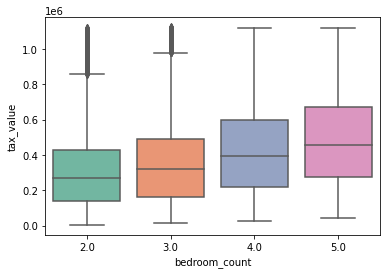

In [10]:
explore.bedroom_taxvalue_corr()

## Does a greater square foot (size) cause for a greater tax valuation?

### Testing Square Feet to Tax Valuation:

#### Null Hypothesis:
    - There is no correlation between the square feet (size) and the 
    tax valuation of a home

#### Alternative Hypothesis:
    - There is a correlation between the square feet (size) and the 
    tax valuation of a home

 The correlation between the square feet of a home and the tax value is: 0.45
 The P value between the square feet of a home and tax value is:  0.00
 
Reject null hypothesis:
 'There is no correlation between the square feet and the tax value of a home'


We now move forward with our alternative hypothesis: 'There is a correlation between the square feet and tax value of a home.'


This is a weak positive correlation.


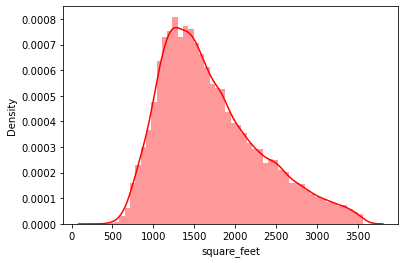

In [11]:
explore.squarefeet_taxvalue_corr()

## Does a home's age cause for a greater tax valuation?

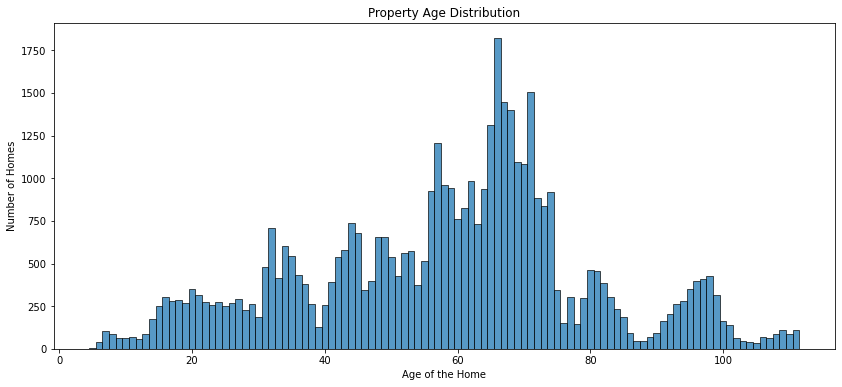

In [12]:
# We can see that most of the homes are between 50-75 years old
# Let's see if there is any correlation
explore.age_graph()

### Testing Square Feet to Tax Valuation:

#### Null Hypothesis:
    - There is no correlation between the age and the tax value of a 
    home

#### Alternative Hypothesis:
    - There is a correlation between the age and the tax value of a 
    home

 The correlation between the age of a home and the tax value is: -0.23
 The P value between the age of a home and tax value is:  0.00
 
Reject null hypothesis:
 'There is no correlation between the age of a home and the tax value'


We now move forward with our alternative hypothesis: 'There is a correlation between the age of a home and tax value'


This is a weak negative correlation.


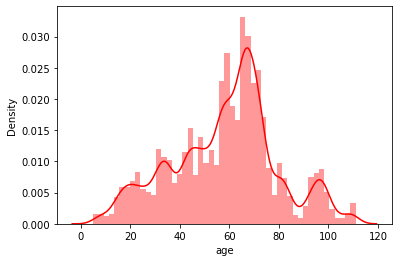

In [13]:
# negative correlation is due to newer homes represent a smaller number 
explore.age_corr()

<hr style="border:1px solid black"> </hr>


# Evaluations:

In [14]:
#Big box of code to build our modeling data and baseline = RMSE(mean)

#setting scaled features
scaled = ['bathroom_count_scaled', 'bedroom_count_scaled', 'square_feet_scaled']

#set up modeling data
X_train = train[scaled]
y_train = train.tax_value

X_validate = validate[scaled]
y_validate = validate.tax_value

X_test = test[scaled]
y_test = test.tax_value

#turning y_train & y_test to dataframes so we can append new columns
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

#tax_value mean
tax_value_pred_mean = y_train['tax_value'].mean()
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean

#RMSE of tax_value_pred_mean
rmse_train_mean = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean)**(1/2)
rmse_validate_mean = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean)**(1/2)

rmse_base = rmse_train_mean

print('             BASELINE')
print('----------------------------------')
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train_mean, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate_mean, 2))
print('----------------------------------')

             BASELINE
----------------------------------
RMSE using Mean
Train/In-Sample:  244508.12 
Validate/Out-of-Sample:  247097.72
----------------------------------


### Linear Regression

In [15]:
# create & fit model:
lm = LinearRegression(normalize=True)
lm.fit(X_validate, y_validate['tax_value'])
#evaluate rmse for train and validate:
y_train['ols_yhat'] = lm.predict(X_train)
rmse_train = mean_squared_error(y_train.tax_value, y_train['ols_yhat'])**(1/2)
y_validate['ols_yhat'] = lm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate['ols_yhat'])**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for OLS using LinearRegression
Training/In-Sample:  217231.14215219778 
Validation/Out-of-Sample:  219603.42921804416


### LassoLars

In [16]:
lars = LassoLars(alpha=1.0)
lars.fit(X_train, y_train['tax_value'])
#evaluate: rmse
y_train['lars_yhat'] = lars.predict(X_train)

rmse_train = mean_squared_error(y_train.tax_value, y_train['lars_yhat'])**(1/2)


y_validate['1ars_yhat'] = lars.predict(X_validate)

rmse_validate = mean_squared_error(y_validate.tax_value, y_validate['1ars_yhat'])**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Lasso + Lars
Training/In-Sample:  217169.4394406964 
Validation/Out-of-Sample:  219660.58123220125


### TweedieRegressor (GLM)


In [17]:
glm = TweedieRegressor(power=1, alpha=0)
glm.fit(X_train, y_train.tax_value)

y_train['glm_yhat'] = glm.predict(X_train)
rmse_train = mean_squared_error(y_train.tax_value, y_train['glm_yhat'])**(1/2)
y_validate['glm_yhat'] = glm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate['glm_yhat'])**(1/2)
print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  217553.07258028557 
Validation/Out-of-Sample:  219826.42345720663


#### All three models performed almost identical to the features expressed.
#### Of the three Lasso Lars performed the best for train and validate

<hr style="border:1px solid black"> </hr>


## Test Our Best Model

In [18]:
y_test = pd.DataFrame(y_test)

lars = LassoLars(alpha=1.0)
lars.fit(X_test, y_test['tax_value'])
#evaluate: rmse
y_test['lars_yhat'] = lars.predict(X_test)

rmse_test = mean_squared_error(y_test.tax_value, y_test['lars_yhat'])**(1/2)


#y_validate['1ars_yhat'] = lars.predict(X_validate)

#rmse_validate = mean_squared_error(y_validate.tax_value, y_validate['1ars_yhat'])**(1/2)

print(f"RMSE for Lasso + Lars\nTest/Final Sample: {rmse_test:.2f}")   

RMSE for Lasso + Lars
Test/Final Sample: 215748.95


In [19]:
#the difference between our test and baseline
round(rmse_base - rmse_test,2)

28759.17

<hr style="border:1px solid black"> </hr>


# Conclusion / Takeaways:
    - Modeling the drivers bathrooms, bedrooms, and square feet 
    proved to be stronger than the baseline for predicting tax value.
    - County could play a bigger role but the data wasn't equally 
    distributed.
    - Age was explored but not used in modeling
    - Lasso Lars was the top regression model
    
   #### With more time I would
       - Search the data for more possible drivers (swimming pool, garage, zipcode)
       - Utilize more feature engineering
       - Provide more modeling to beat the current best
   
   ### Thank you for your time and feel free to reach for any questions